In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.DataFrame()

In [ ]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [ ]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

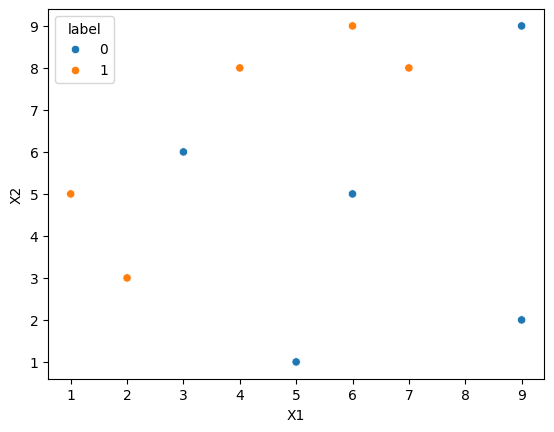

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [ ]:
df.columns

Index(['X1', 'X2', 'label'], dtype='object')

In [ ]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [ ]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [ ]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

### Stump 1

Step2: Train 1st model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1)

In [ ]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

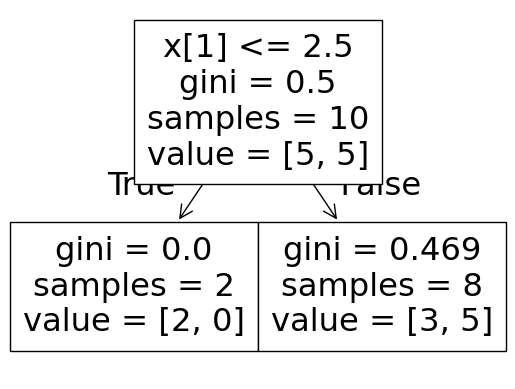

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

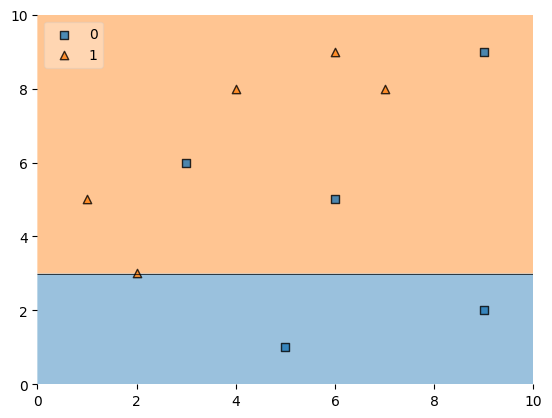

In [ ]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [ ]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [ ]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error+0.000000001))

In [ ]:
def count_te(df):
  #returning % of error
  return int((df['label']!=df['y_pred']).sum())/10

Step 3: Calculate Model Weight

In [ ]:
error = count_te(df)
error

0.3

In [ ]:
alpha1 = calculate_model_weight(error)
alpha1

np.float64(0.42364892852693514)

Step 4: Update Weights


In [ ]:
def update_row_weights(row, alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [ ]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [ ]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [ ]:
df['weights'].sum()

np.float64(1.0)

In [ ]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [ ]:
df['normalized_weights'].sum()

np.float64(1.0)

In [ ]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [ ]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [ ]:
df.columns

Index(['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
       'normalized_weights', 'cumsum_upper', 'cumsum_lower'],
      dtype='object')

In [ ]:
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [ ]:
def create_new_data(df):
  indexs = []

  for i in range(df.shape[0]):
    a = np.random.random()
    # print(a)
    for idx, row in df.iterrows():
      # print(idx)
      # print(row)
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indexs.append(idx)
  return indexs

In [ ]:
idx_vals = create_new_data(df)
idx_vals

[1, 7, 7, 6, 4, 7, 8, 2, 2, 5]

In [ ]:
second_df = df.iloc[idx_vals, 0:4]
second_df

,X1,X2,label,weights
1,2,3,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
6,6,5,0,0.1
4,5,1,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1


### Stump 2

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [ ]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.5, '  False')]

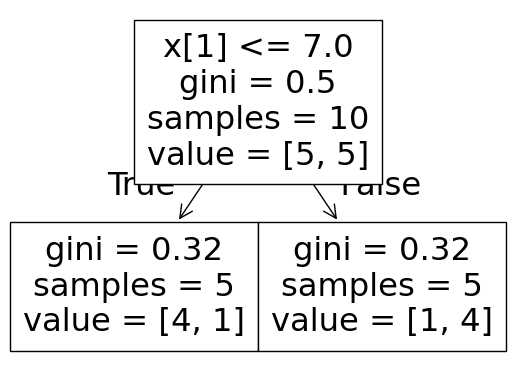

In [ ]:
plot_tree(dt2)

<Axes: >

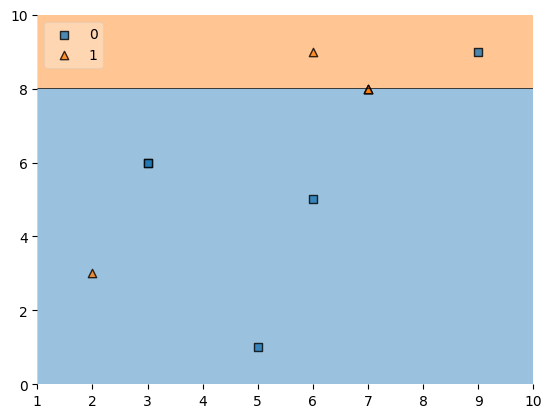

In [ ]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [ ]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
6,6,5,0,0.1,0
4,5,1,0,0.1,0
7,7,8,1,0.1,1
8,9,9,0,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1


In [ ]:
error = count_te(second_df)
error

0.2

In [ ]:
alpha2 = calculate_model_weight(error)
alpha2

np.float64(0.6931471780599453)

In [ ]:
# step 4 : Update weights

def update_row_weights(row, alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [ ]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,0,0.297427
7,7,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
8,9,9,0,0.1,1,0.297427
2,3,6,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622


In [ ]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
1,2,3,1,0.1,0,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,1,0.297427,0.344313
2,3,6,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922


In [ ]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [ ]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [ ]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,0,0.344313,0.000000,0.344313
7,7,8,1,0.1,1,0.038922,0.344313,0.383235
7,7,8,1,0.1,1,0.038922,0.383235,0.422157
6,6,5,0,0.1,0,0.038922,0.422157,0.461078
4,5,1,0,0.1,0,0.038922,0.461078,0.500000
7,7,8,1,0.1,1,0.038922,0.500000,0.538922
8,9,9,0,0.1,1,0.344313,0.538922,0.883235
2,3,6,0,0.1,0,0.038922,0.883235,0.922157
2,3,6,0,0.1,0,0.038922,0.922157,0.961078
5,6,9,1,0.1,1,0.038922,0.961078,1.000000


In [ ]:
index_values = create_new_data(second_df)
index_values

[8, 8, 4, 5, 8, 1, 8, 2, 7, 1]

In [ ]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1


### Stump 3

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [ ]:
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

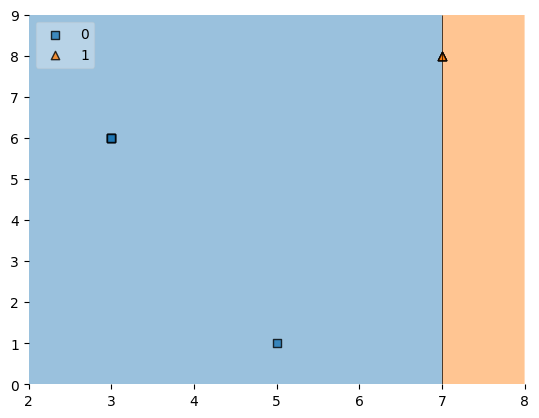

In [ ]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [ ]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1


In [ ]:
error = count_te(third_df)
error

0.0

In [ ]:
alpha3 = calculate_model_weight(error)
alpha3

np.float64(10.361632918473205)

In [ ]:
print(alpha1,alpha2,alpha3)

0.42364892852693514 0.6931471780599453 10.361632918473205


### Prediction

In [ ]:
def final_out(query):
  out1 = dt1.predict(query)
  out2 = dt2.predict(query)
  out3 = dt3.predict(query)

  return np.sign(alpha1*out1 + alpha2*out2 + alpha3*out3)

Prediction for query point Xq = {1, 5}

In [ ]:
query = np.array([1, 5]).reshape(1,2)
query

array([[1, 5]])

In [ ]:
final_out(query)

array([1.])

Prediction for query point Xq = {9, 9}

In [ ]:
query = np.array([9,9]).reshape(1,2)
query

array([[9, 9]])

In [ ]:
final_out(query)

array([1.])